In [8]:
#imports 

import dual_autodiff.dual as da
import dual_autodiff_x.dual as dx
import psutil
import timeit
import numpy as np
import os
import pickle
import timeit
import matplotlib.pyplot as plt

## Python vs Cython performance

To time my python vs cython module I first pin my process to a single CPU, this is to try and reduce variability between runs by ensuring thorughout the script the same core is being used.

However for simple and lightweight tasks such as the functions tested in this notebook, pinning the process to a cpu may be a little overkill, moreover this introduction makes it more cumbersome for the sharing of the code as the cpu_affinity method is not supported on macOS. Therefore the reader should be aware that for the generation of figures and data for the report the process was pinned to a single core, however in the distribution of this norebook for testing, this element has been commented out. 


I then defined a timeing function. This takes in a function and times how long it takes to perform a defined number of runs and calculates the average time taken. It repeates this a number of times and givesan average time taken with some error.

My timing function takes in a "loops" argument that defines the number of runs to use and a "repeats" argument that defines the number of times this process is repeated and the average is taken over.

As these functions are all quite fast we want to use a large number of loops meaning that our timing function is measurring over a larger time and thus the percentage error from overheads in the timing process are reduced. We can divide this total time by the number of loops to get the average time per operation and then average this across our repeats. 

I then use this function to test a wide array of dual methods from both the python and the cython package. The results of the timing are then stored in either the results_Python or results_cython dict with a key being the function and the value being a tuple of time and error. 


Note for low numbers of runs there is substantial variablity in the timing of these operations and differences may depend on what background processes are being run on ones machine. 



In [9]:

#pinning of the process commented out in distribution

#import psutil
#import os

# Pin the process to a single core to ensure the same core is used throughout the benchmarking. This hopefully helps reduce some 
#p = psutil.Process(os.getpid())
#p.cpu_affinity([0])  


In [15]:


# lets first create a function that we can use to benchmark 

loops = 1000
repeats = 10


def timing(function, loops, repeats):


    """
    Function calculates the time and error for a function to be run. Calculates this by repeating the operation "loop" number
    of times averaging the result and then repeating for a "repeats" number of times. The final output is the average time across
    these repeats.

    parameters
        function: func
            function to be timed
        loops: int
            number of times function is run in a single epoch
        repeates:int
            number of epochs run 

    returns 
        tuple containing time for operation to be completed and the error on this time

    """


    # create an array of times, where each element is the time taken to run the function loop number of times. and the length is the number
    # of repeats
    times = timeit.repeat(function, number = loops, repeat=repeats)
    
    # find average time and standard deviation of the time taken to run the operation loop number of times
    average_run_time = np.average(times)
    error_run_time = np.std(times)

    # divide this average time by the number of loops in each epoch to get the average time to run a single operation
    avg_operation_time = average_run_time/loops
    
    # the error is then the error on the mean, but we also need to divide by number of loops to go from error on the time to run an epoch 
    # to the error on the time to run a single operation
    error = error_run_time/(np.sqrt(repeats)*loops)

    return avg_operation_time, error


# lets create functions to test 
def benchmark_init_python():
    d1 = da.Dual(1,1)
    d2 = da.Dual(100,200)

def benchmark_init_cython():
    d1 = dx.Dual(1,1)
    d2 = dx.Dual(100,200)


# note for the rest of our functions they will take in Dual objects as apposed to initilising it themseleves
# so the results are not influenced by difference in time to initialise objects

# Also ensure value of objects are the same

# initialise python dual numbers
pyda1 = da.Dual(123,456)
pyda2 = da.Dual(78.9, 10.11)

# initialise cython dual numbers
cydx1 = dx.Dual(123,456)
cydx2 = dx.Dual(78.9, 10.11)


# define our remainig functions to test, theres probably a more efficient or pythonic way to do this, but in the name of clarity listing 
# out the functions has been done


def benchmark_add_python():
    pyda1+pyda2

def benchmark_add_cython():
    cydx1+cydx2

def benchmark_minus_python():
    pyda1-pyda2

def benchmark_minus_cython():
    cydx1-cydx2

def benchmark_mult_python():
    pyda1*pyda2

def benchmark_mult_cython():
    cydx1*cydx2


def benchmark_div_python():
    pyda1/pyda2

def benchmark_div_cython():
    cydx1/cydx2


def benchmark_trig_python():
    pyda1.sin()

def benchmark_trig_cython():
    cydx1.sin()


def benchmark_exp_python():
    pyda1.exp()


def benchmark_exp_cython():
    cydx1.exp()


def benchmark_log_python():
    pyda1.log()


def benchmark_log_cython():
    cydx1.log()


def benchmark_pow_python():
    pyda1**pyda2

def benchmark_pow_cython():
    cydx1**cydx2




# I could loop through global function names however personally i dont likefor readability i prefer the below code, although somewhat cumbersome

init_python_time = timing(benchmark_init_python,loops, repeats)
print("timing of python initialisation done")
init_cython_time = timing(benchmark_init_cython,loops, repeats)
print("timing of cython initialisation done")
add_python_time = timing(benchmark_add_python,loops, repeats)
print("timing of python addition done")
add_cython_time = timing(benchmark_add_cython,loops, repeats)
print("timing of cython addition done")
minus_python_time = timing(benchmark_minus_python, loops, repeats)
print("timing of python subtraction done")
minus_cython_time = timing(benchmark_minus_cython, loops, repeats)
print("timing of cython subtraction done")
mult_python_time = timing(benchmark_mult_python, loops, repeats)
print("timing of python multiplication done")
mult_cython_time = timing(benchmark_mult_cython, loops, repeats)
print("timing of cython multiplication done")
trig_python_time = timing(benchmark_trig_python, loops, repeats)
print("timing of python trigonometry done")
trig_cython_time = timing(benchmark_trig_cython, loops, repeats)
print("timing of cython trigonometry done")
log_python_time = timing(benchmark_log_python, loops, repeats)
print("timing of python logarithm done")
log_cython_time = timing(benchmark_log_cython, loops, repeats)
print("timing of cython logarithm done")
exp_python_time = timing(benchmark_exp_python, loops, repeats)
print("timing of cython exponential done")
exp_cython_time = timing(benchmark_exp_cython, loops, repeats)
print("timing of cython exponential done")
div_python_time = timing(benchmark_div_python, loops, repeats)
print("timing of python division done")
div_cython_time = timing(benchmark_div_cython, loops, repeats)
print("timing of cython division done")
pow_python_time = timing(benchmark_pow_python, loops, repeats)
print("timing of python power done")
pow_cython_time = timing(benchmark_pow_cython, loops, repeats)
print("timing of cython python done")

# store results in dictionary 

# once again could be done more efficiently however i prefer the below for readibility

results_python = {
    "Addition": [add_python_time[0],add_python_time[1]],
    "Subtraction" :  [minus_python_time[0],minus_python_time[1]],
    "Multiplication" :  [mult_python_time[0],mult_python_time[1]],
    "Division" : [div_python_time[0],div_python_time[1]],
    "Initialisation" : [init_python_time[0],init_python_time[1]],
    "Trigonometric" : [trig_python_time[0],trig_python_time[1]],
    "Logarithmic" : [log_python_time[0],log_python_time[1]],
    "Exponential" : [exp_python_time[0],exp_python_time[1]], 
    "Power" : [pow_python_time[0],pow_python_time[1]], 
}

results_cython = {
    "Addition": [add_cython_time[0],add_cython_time[1]],
    "Subtraction" :  [minus_cython_time[0],minus_cython_time[1]],
    "Multiplication" :  [mult_cython_time[0],mult_cython_time[1]],
    "Division" : [div_cython_time[0],div_cython_time[1]],
    "Initialisation" : [init_cython_time[0],init_cython_time[1]], 
    "Trigonometric" : [trig_cython_time[0],trig_cython_time[1]],
    "Logarithmic" : [log_cython_time[0],log_cython_time[1]],
    "Exponential" : [exp_cython_time[0],exp_cython_time[1]], 
    "Power" : [pow_cython_time[0],pow_cython_time[1]], 
}



timing of python initialisation done
timing of cython initialisation done
timing of python addition done
timing of cython addition done
timing of python subtraction done
timing of cython subtraction done
timing of python multiplication done
timing of cython multiplication done
timing of python trigonometry done
timing of cython trigonometry done
timing of python logarithm done
timing of cython logarithm done
timing of cython exponential done
timing of cython exponential done
timing of python division done
timing of cython division done
timing of python power done
timing of cython python done


# Plotting results

Note that for plots produced for the report the timing function was run with loops of 1000000 and repeats = 100. This took approximately 2.5h to run but was done to ensure the most accurate values for times of functions. The results of this run has been pickled into python_times.pkl and cython_times.pkl respectively. These may be unpickled to obtain the same results, or one may run the notebook again, with a lower value of times and repeats which runs far quicker. But note that for lower repeats and loops variability increases substancially

In [18]:
# if one wishes to plot the picked data obtained from the run of 1000000 and 100 repeats then run the below code, if not the
# change the below to False

plot_pickled_data = True

if plot_pickled_data == True:
    with open("PythonVsCython_times/python_times.pkl", "rb") as file:
        results_python = pickle.load(file)
    with open("PythonVsCython_times/cython_times.pkl", "rb") as file:
        results_cython = pickle.load(file)




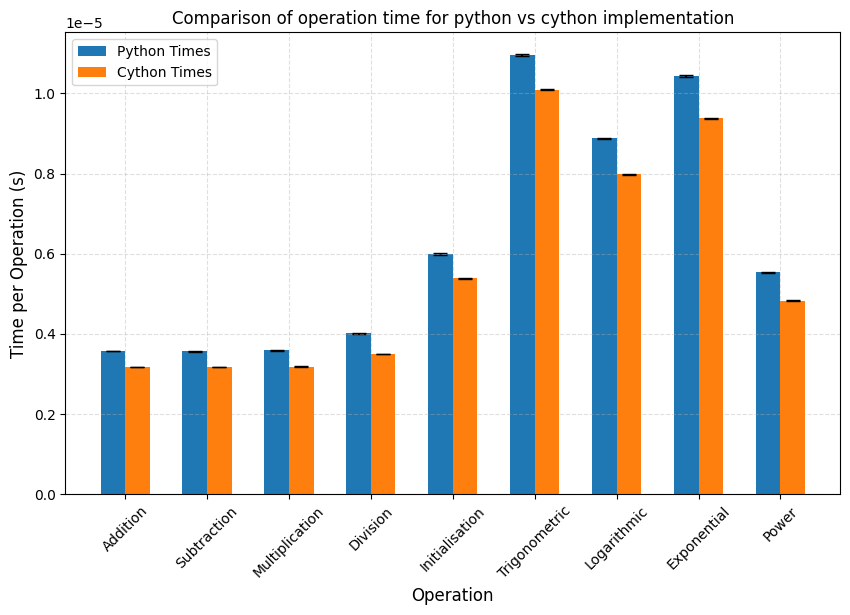

In [19]:
# first grab the names of the operations tested
operations = list(results_python.keys())

# now lets create a list of values and errors for our python and cython 
python_times = [results_python[operation][0] for operation in operations]
python_errors = [results_python[operation][1] for operation in operations]

cython_times = [results_cython[operation][0] for operation in operations]
cython_errors = [results_cython[operation][1] for operation in operations]


# plotting 
fig, ax = plt.subplots(figsize = (10,6))
ax.grid(alpha = 0.4, linestyle = '--')

# to get the barcharts next to eachover we can plot the bars using the index of the operation and add an offset to cython and python
x = np.arange(len(operations))

# set our width of bar
width = 0.3

#set our barchart positions, ofsetting python vs cython so they are next to eachover
#python bar
ax.bar(x-width/2, python_times, width = width, yerr = python_errors, capsize = 5, label = "Python Times", zorder = 1 )
#cython bar
ax.bar(x+width/2, cython_times, width = width, yerr = cython_errors, capsize = 5, label = "Cython Times", zorder = 2)


ax.set_xlabel("Operation", fontsize = 12)
ax.set_ylabel("Time per Operation (s)", fontsize = 12)
ax.set_title("Comparison of operation time for python vs cython implementation")
#replace our x labels back with our operation names
ax.set_xticks(x)
ax.set_xticklabels(operations, rotation=45)
ax.legend()


C:\Users\josh1\AppData\Local\Temp\ipykernel_25028\943400027.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


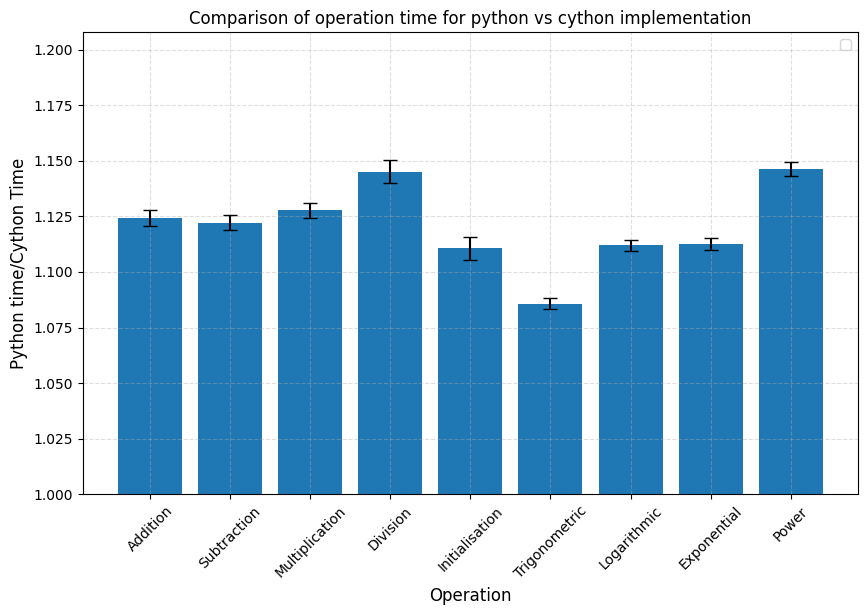

In [20]:
# we may also graph the speed increase from python to cython

speed_increases = []
speed_increase_errors = []

# iterate through each of our operations 
for operation in operations:
    

    # grab the times and erros for each of our operations
    python_time = results_python[operation][0]
    python_error = results_python[operation][1]
    cython_time = results_cython[operation][0]
    cython_error = results_cython[operation][1]


    # calcualte ration of python vs cython time
    speed_ratio= python_time/cython_time

    speed_increases.append(speed_ratio)

    # calculate errors on our ration using the quotaint rule in error propogation
    error = speed_ratio * ((python_error / python_time) ** 2 + (cython_error / cython_time) ** 2) ** 0.5
    speed_increase_errors.append(error)




# plotting 
fig, ax = plt.subplots(figsize = (10,6))
ax.grid(alpha = 0.4, linestyle = '--')


# set our width of bar
width = 0.3

ax.bar(operations, speed_increases, yerr = speed_increase_errors, capsize = 5)

# set the bars to start at 1 for readability
ax.set_ylim(1)


ax.set_xlabel("Operation", fontsize = 12)
ax.set_ylabel("Python time/Cython Time", fontsize = 12)
ax.set_title("Comparison of operation time for python vs cython implementation")
ax.set_xticks(x)
ax.set_xticklabels(operations, rotation=45)
ax.legend()



# Interpretation

So there are a few things to take away from the above figures:

The first is that the cythnon implementation is faster in all cases than the python implementation. This is due to Cython being compiled in c which reduces python overhead allowing for faster code execution. Cython also allows for static typing which would also lead to greater time reduction, however in this case the cython code is the same as the python code, no static typing has been implemented so these gains are not present.

Another overall trend is that in both python and cython the arithmetic functions are quicker than the trigonometric functions, exponential and powers. This is expected behavior and is due to the higher complexity of this later operations than the simple arithmetic. Moreover we see division taking slighly longer than multiplication, addition and subtraction, liklely stemming from the fact that CPU's find addition and multiplication easier than division, most cpus have dedicated multiplication units whereas divison is normally handled via itertaive algorthms and is hence slower. 

A final overall trend is despite there being a general performance increase across all operations, we are seeing a rnage of 10% to 15% speed increase, far from the 3x some might expect. This has a few likly explanations, the fist being that most of these operations are relativly simple and have little overhead and so only slight gains from going from cytho to python would be expected. Another casue is that for the cexponential and trig functions the python implementation relies on numpy which already performs these operations in optimized C. The final possibiity could stem from the implementation, following good software practices these operations in python have been written with multiple type checks and error handling checks to avoid the user making an error and to exploit polymorphism where possible, thhen when moved to Cython these checks have remianing and static typing has not been utilized. This means that the various typechecking which takes up considerbale time as not been reduced when moving to cython therefore possibly acting as a bottleneck and reducing the percentage increase in speed.

More specifically we see that the operations that saw the greatest speed increase were the arithmetic operations as well as the power, whereas the trig log and exponential see reduced increase. This likly stems from the above points that the trig, log and exp functios already make use of numpy functions in their python implementation and so we see reduced speed increase when moving to cython. 
